# SmartInternz Externship Program - Applied Data Science - Assignment 3

### Name: Sanskriti Sanjay Kumar Singh <br> Reg No: 20BCE1415 <br> Email: sanskriti.sanjaykumar2020@&#65279;vitstudent.ac.in <br> Campus: VIT Chennai

In [1]:
# Importing the necessary packages and libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from math import sqrt

## 1. Loading the Dataset

In [2]:
df = pd.read_csv("Housing.csv")

In [3]:
# Displaying the first 5 records of the dataset
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,furnished


In [4]:
# Displaying the shape of the dataset i.e. (no. of records, no. of attributes)
df.shape

(545, 12)

In [5]:
# Displaying information about the dataset attributes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  furnishingstatus  545 non-null    object
dtypes: int64(6), object(6)
memory usage: 51.2+ KB


In [6]:
# Displaying the column labels of the dataset
df.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'furnishingstatus'],
      dtype='object')

## 2. Visualizations

### 2.1 Types of Data
Qualitative Data 
<br>
Nominal: mainroad, guestroom, basement, hotwaterheating, airconditioning, furnishingstatus
<br>
Ordinal: -
<br><br>
Quantitative Data
<br>
Discrete: bedrooms, bathrooms, stories, parking
<br>
Continuous: price, area

### 2.2 Univariate Analysis

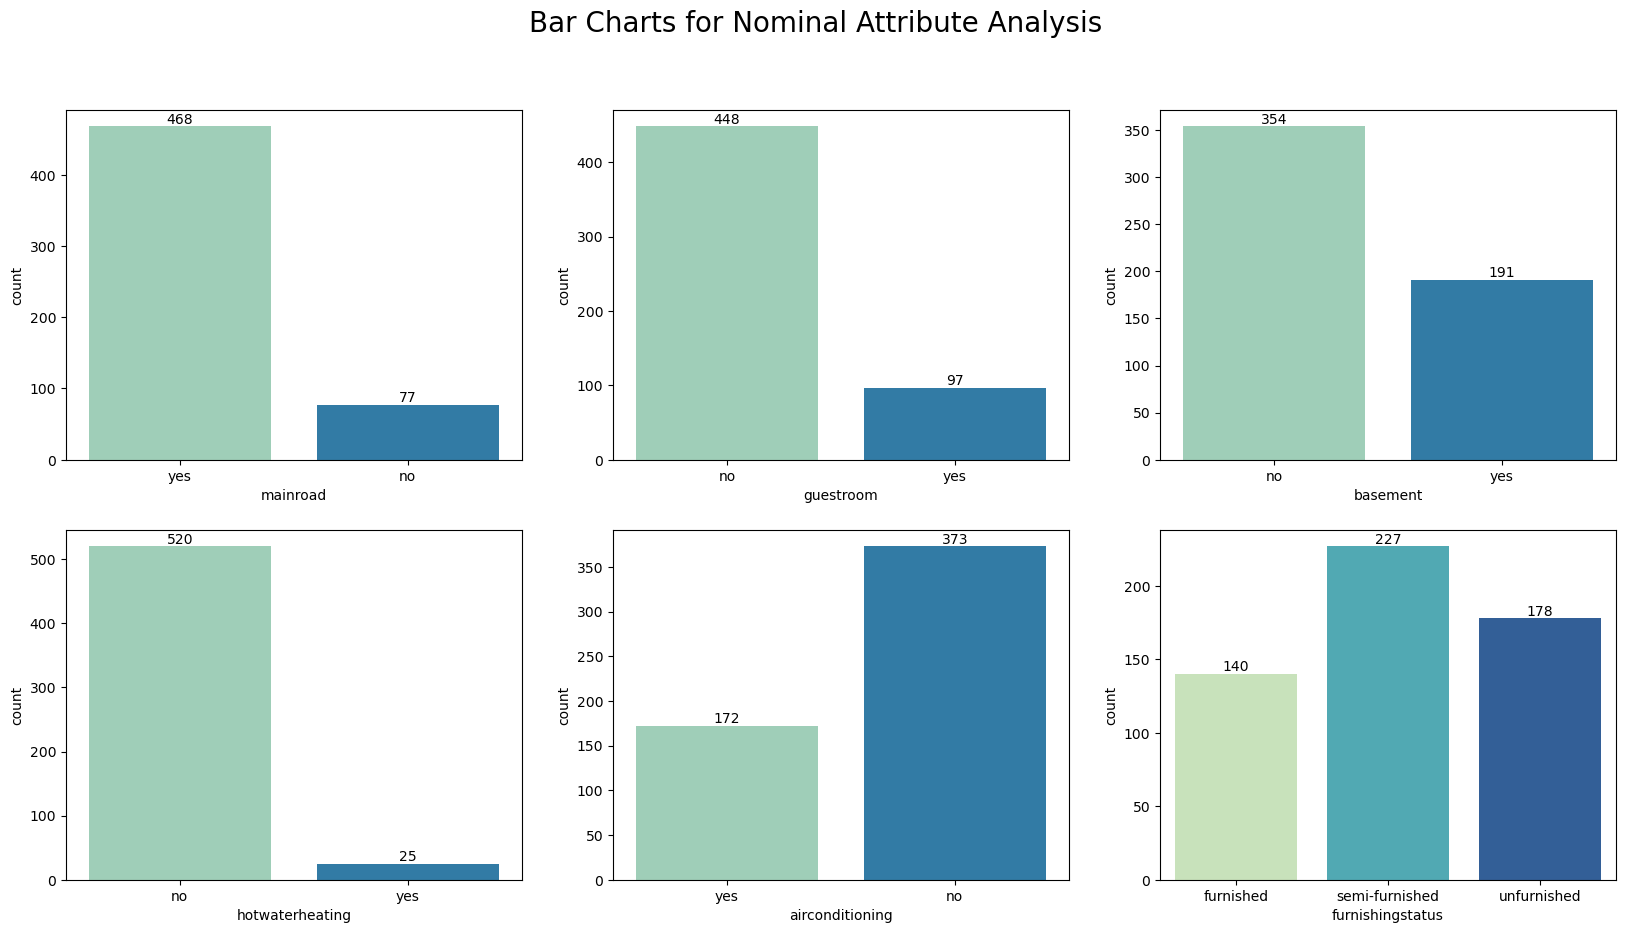

In [7]:
# Creating Bar Charts for Nominal Attribute Analysis
fig,ax = plt.subplots(2,3,figsize=(20,10))
fig.suptitle('Bar Charts for Nominal Attribute Analysis', fontsize = 20)

sns.countplot(ax = ax[0,0], x = 'mainroad', data = df, palette = 'YlGnBu')
ax[0,0].bar_label(ax[0,0].containers[0])
sns.countplot(ax = ax[0,1], x = 'guestroom', data = df, palette = 'YlGnBu')
ax[0,1].bar_label(ax[0,1].containers[0])
sns.countplot(ax = ax[0,2], x = 'basement', data = df, palette = 'YlGnBu')
ax[0,2].bar_label(ax[0,2].containers[0])

sns.countplot(ax = ax[1,0], x = 'hotwaterheating', data = df, palette = 'YlGnBu')
ax[1,0].bar_label(ax[1,0].containers[0])
sns.countplot(ax = ax[1,1], x = 'airconditioning', data = df, palette = 'YlGnBu')
ax[1,1].bar_label(ax[1,1].containers[0])
sns.countplot(ax = ax[1,2], x = 'furnishingstatus', data = df, palette = 'YlGnBu')
ax[1,2].bar_label(ax[1,2].containers[0]); # semicolon added to remove unecessary output text

<b>Inference:</b> From the above bar charts, it can be observed that a vast majority of the houses in the dataset are on the mainroad, have a guestroom and a hot water heater. Air conditioner and basement seem to not be present in a majority of the houses, with only around 31% of the houses having air conditioner and about 35% having a basement. For the furnishing status of the house, it seems like semi-furnished houses are leading followed by unfurnished and furnished houses. We shall further explore the relationship between these in bivariate and multivariate analysis.

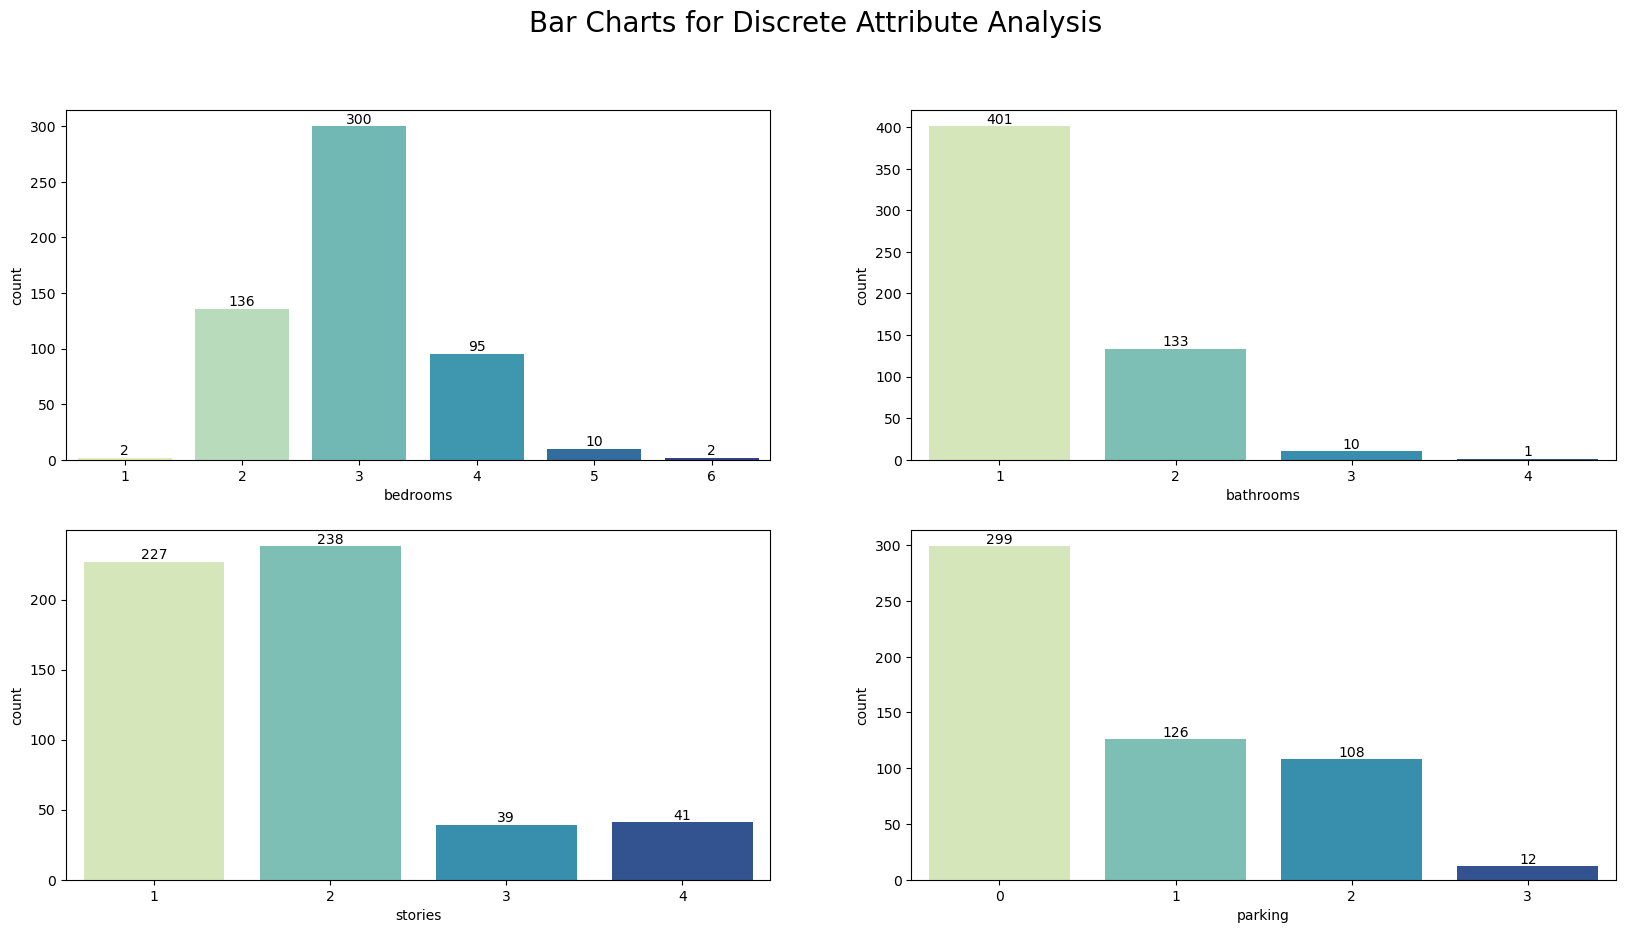

In [8]:
# Creating Bar Charts for Discrete Attribute Analysis
fig,ax = plt.subplots(2,2,figsize=(20,10))
fig.suptitle('Bar Charts for Discrete Attribute Analysis', fontsize = 20)

sns.countplot(ax = ax[0,0], x = 'bedrooms', data = df, palette = 'YlGnBu')
ax[0,0].bar_label(ax[0,0].containers[0])
sns.countplot(ax = ax[0,1], x = 'bathrooms', data = df, palette = 'YlGnBu')
ax[0,1].bar_label(ax[0,1].containers[0])

sns.countplot(ax = ax[1,0], x = 'stories', data = df, palette = 'YlGnBu')
ax[1,0].bar_label(ax[1,0].containers[0])
sns.countplot(ax = ax[1,1], x = 'parking', data = df, palette = 'YlGnBu')
ax[1,1].bar_label(ax[1,1].containers[0]); # semicolon added to remove unecessary output text

<b>Inference:</b> From the above bar charts, we can observe that 55% of the houses consist of 3 bedrooms, 25% consist of 2 bedrooms and 17% consist of 4 bedrooms, i.e., 97% of the houses consist of 2,3 or 4 bedrooms. 74% of the houses present in the dataset consist of one bathroom and 25% of 2 bathrooms, i.e., 99% of the houses consist of 1, and occasionally 2 bathrooms. Majority of the houses consist of 1 or 2 stories, with the occasional houses having 3 or 4 stories. Also, about 55% of the houses do not provide any house parking. Further inferences on these can be made during bivariate and multivariate analysis.

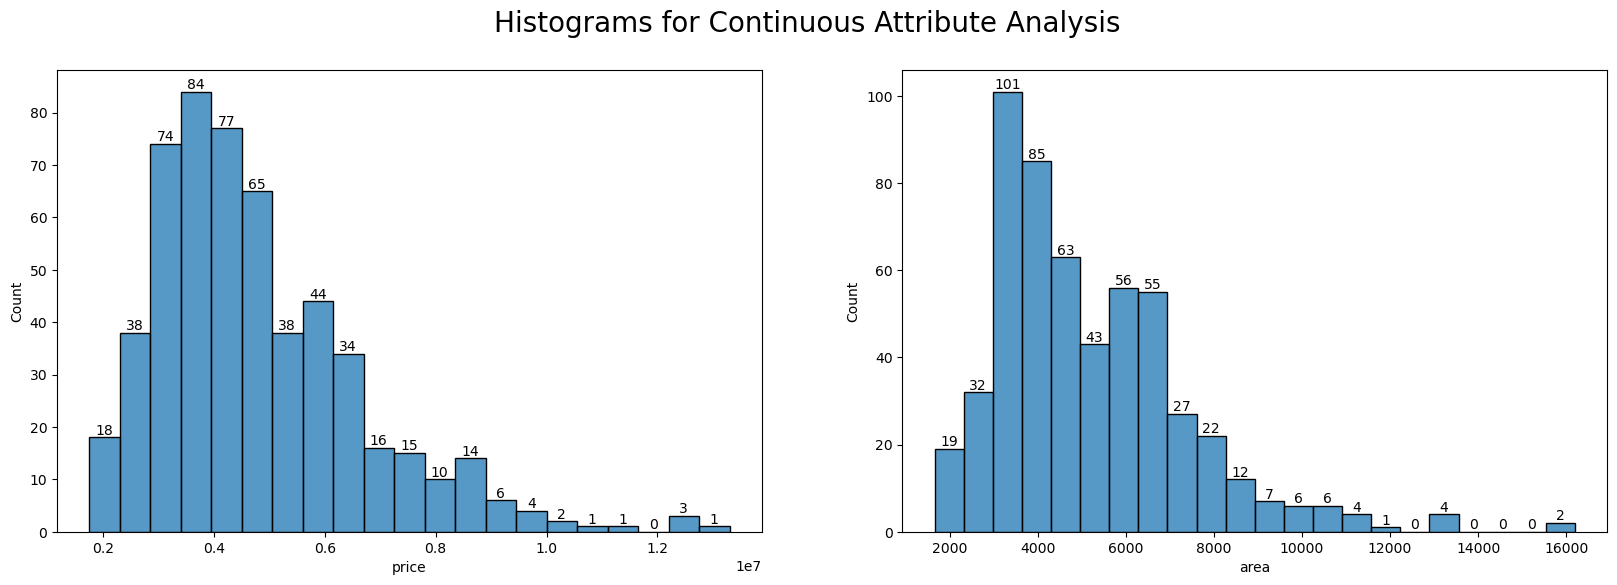

In [9]:
# Creating histogram for Continuous Attribute Analysis
fig,ax = plt.subplots(1,2,figsize=(20,6))
fig.suptitle('Histograms for Continuous Attribute Analysis', fontsize = 20)

sns.histplot(ax = ax[0], x = 'price', data = df, palette = 'YlGnBu')
ax[0].bar_label(ax[0].containers[0])
sns.histplot(ax = ax[1], x = 'area', data = df, palette = 'YlGnBu')
ax[1].bar_label(ax[1].containers[0]); # semicolon added to remove unecessary output text

<b>Inference:</b> From the above histograms, we can observe that the attributes price and area are positively/right-skewed. To get a better performing regression model in this case, linear transformations can be used. We shall deal with linear transformation in the modelling section.

### 2.3 Bivariate Analysis

In [10]:
# Finding the numerical attributes of the dataset
df.select_dtypes(exclude = ['object']).columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking'], dtype='object')

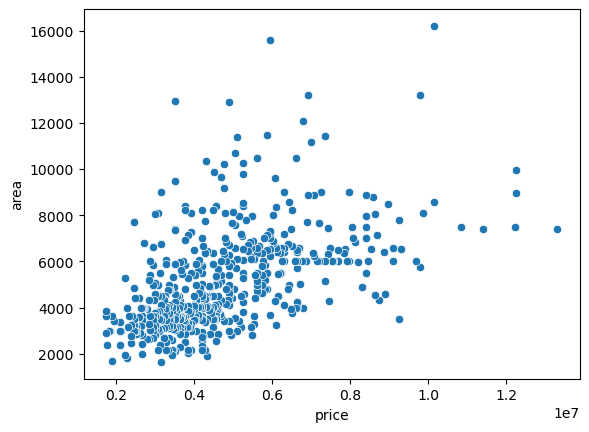

In [11]:
# Creating scatterplots for the target variable (i.e. price) vs the continuous predictor variable
sns.scatterplot(x = 'price', y = 'area', data = df, palette = 'YlGnBu'); # semicolon added to remove unecessary output text

<b>Inference:</b> From the above graph, we can observe that there seems to be a positive correlation between price and area, however the strength seems to be medium-to-weak at most. The strength might improve upon linear transformation since both the variables are right skewed as can be seen from the univariate analysis.

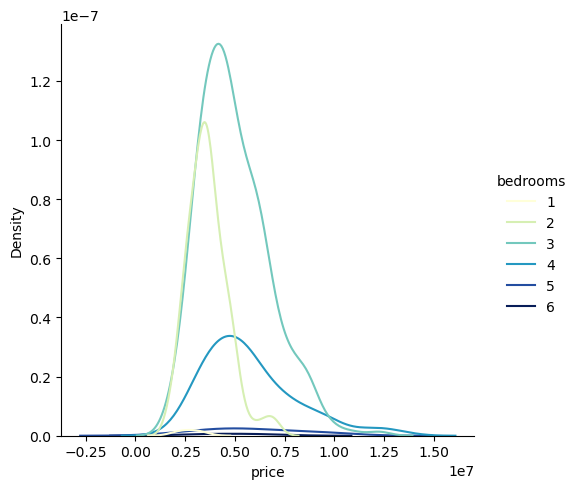

In [12]:
# Creating distribution plot for the target variable, grouped by the discrete predictor variables
sns.displot(x = 'price', hue = 'bedrooms', data = df, kind = 'kde', palette = 'YlGnBu');

C:\Users\singh\anaconda3\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


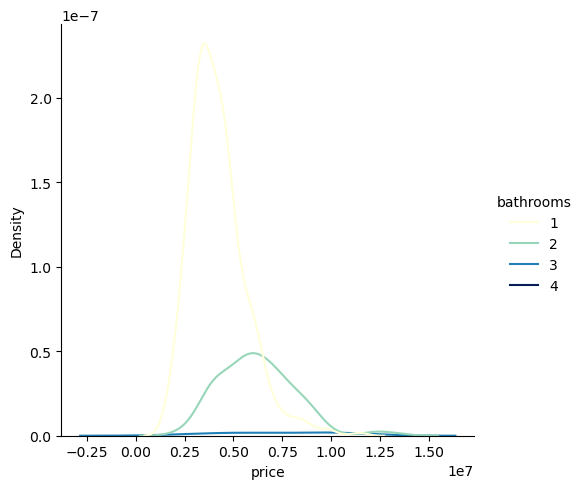

In [13]:
sns.displot(x = 'price', hue = 'bathrooms', data = df, kind = 'kde', palette = 'YlGnBu');

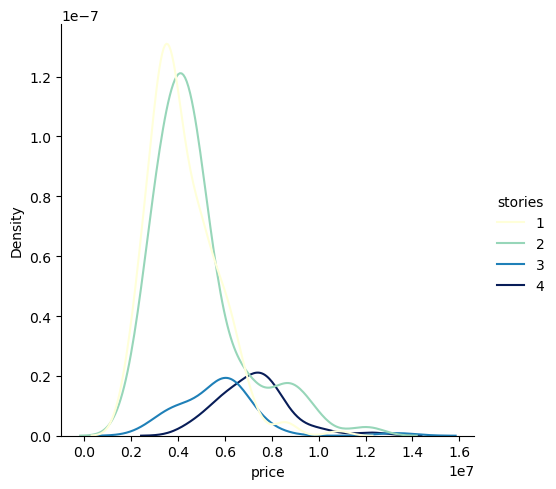

In [14]:
sns.displot(x = 'price', hue = 'stories', data = df, kind = 'kde', palette = 'YlGnBu'); 

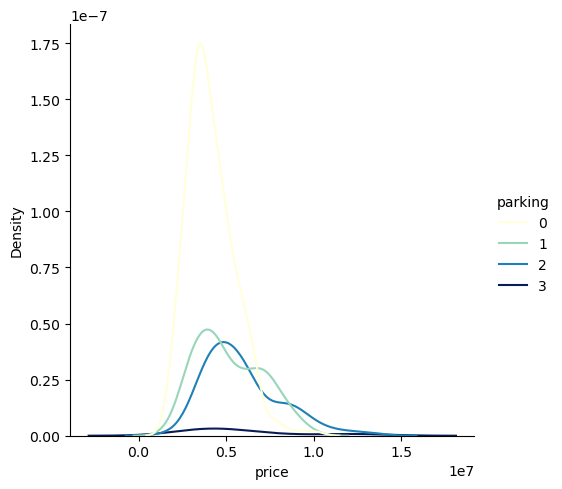

In [15]:
sns.displot(x = 'price', hue = 'parking', data = df, kind = 'kde', palette = 'YlGnBu'); 

<b>Inference:</b> From the above distribution plots, we can clearly observe the distribution of the price wrt the discrete variable groupings. 

In [16]:
# Finding the categorical attributes of the dataset
df.select_dtypes(include = ['object']).columns

Index(['mainroad', 'guestroom', 'basement', 'hotwaterheating',
       'airconditioning', 'furnishingstatus'],
      dtype='object')

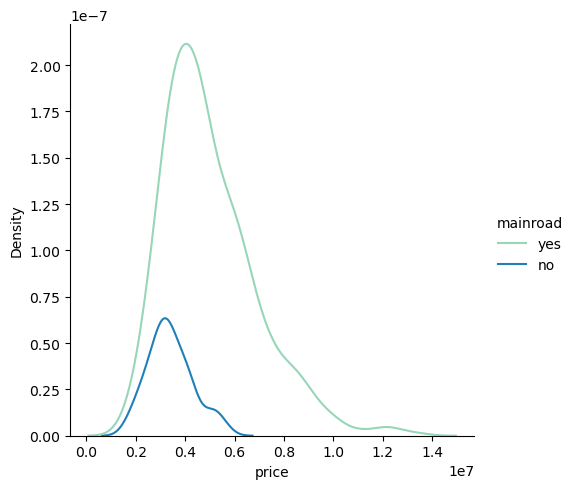

In [17]:
# Creating distribution plot for the target variable, grouped by the categorical predictor variables 
sns.displot(x = 'price', hue = 'mainroad', data = df, kind = 'kde', palette = 'YlGnBu'); 

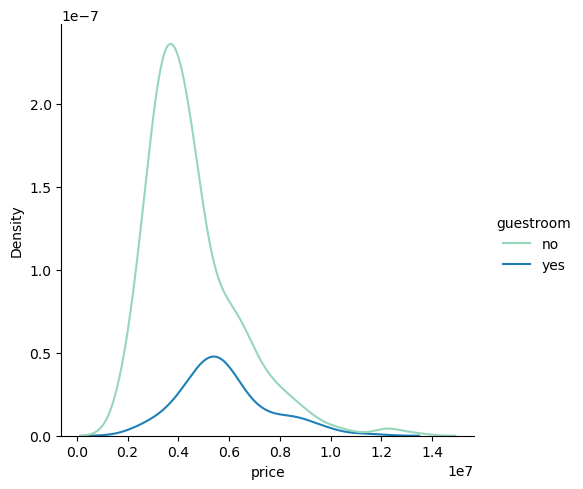

In [18]:
sns.displot(x = 'price', hue = 'guestroom', data = df, kind = 'kde', palette = 'YlGnBu'); 

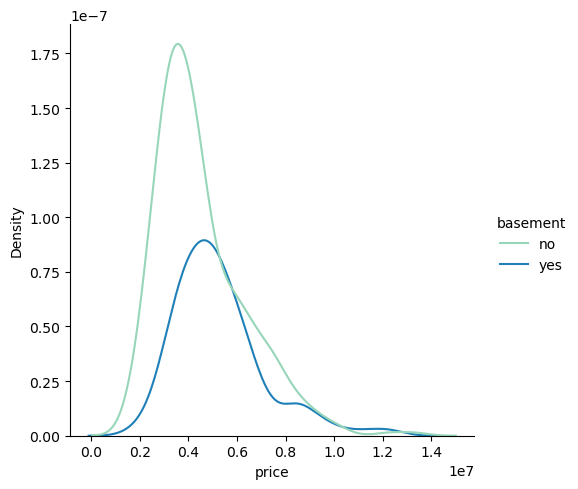

In [19]:
sns.displot(x = 'price', hue = 'basement', data = df, kind = 'kde', palette = 'YlGnBu'); 

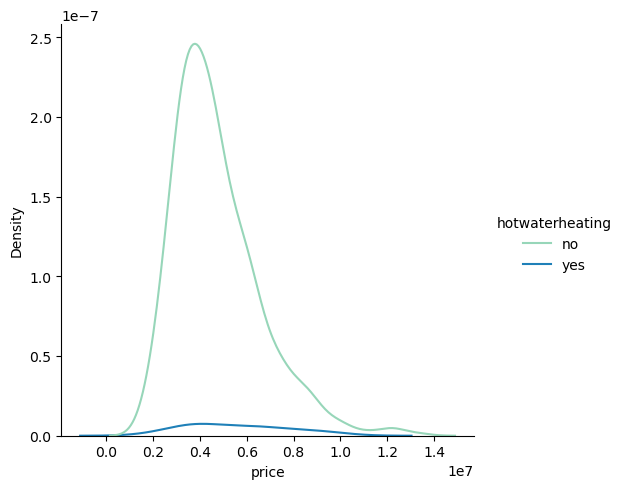

In [20]:
sns.displot(x = 'price', hue = 'hotwaterheating', data = df, kind = 'kde', palette = 'YlGnBu'); 

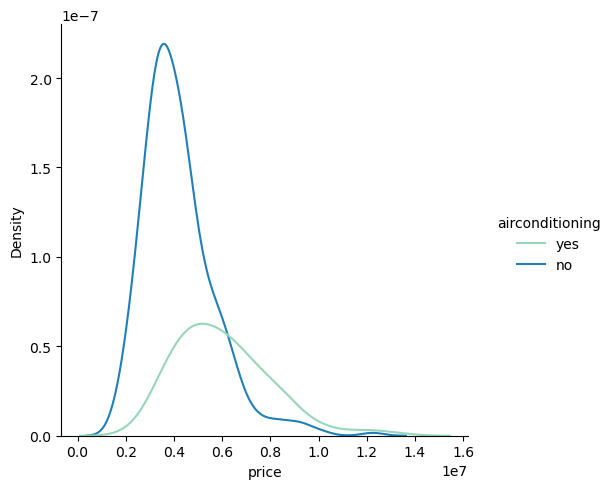

In [21]:
sns.displot(x = 'price', hue = 'airconditioning', data = df, kind = 'kde', palette = 'YlGnBu'); 

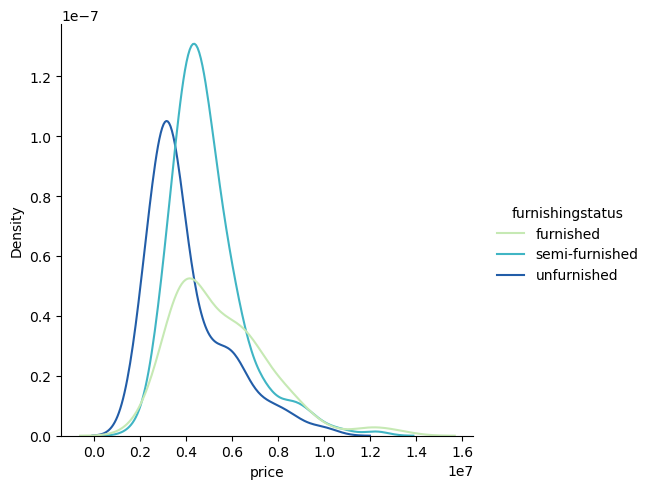

In [22]:
sns.displot(x = 'price', hue = 'furnishingstatus', data = df, kind = 'kde', palette = 'YlGnBu');

### 2.3 Multivariate Analysis

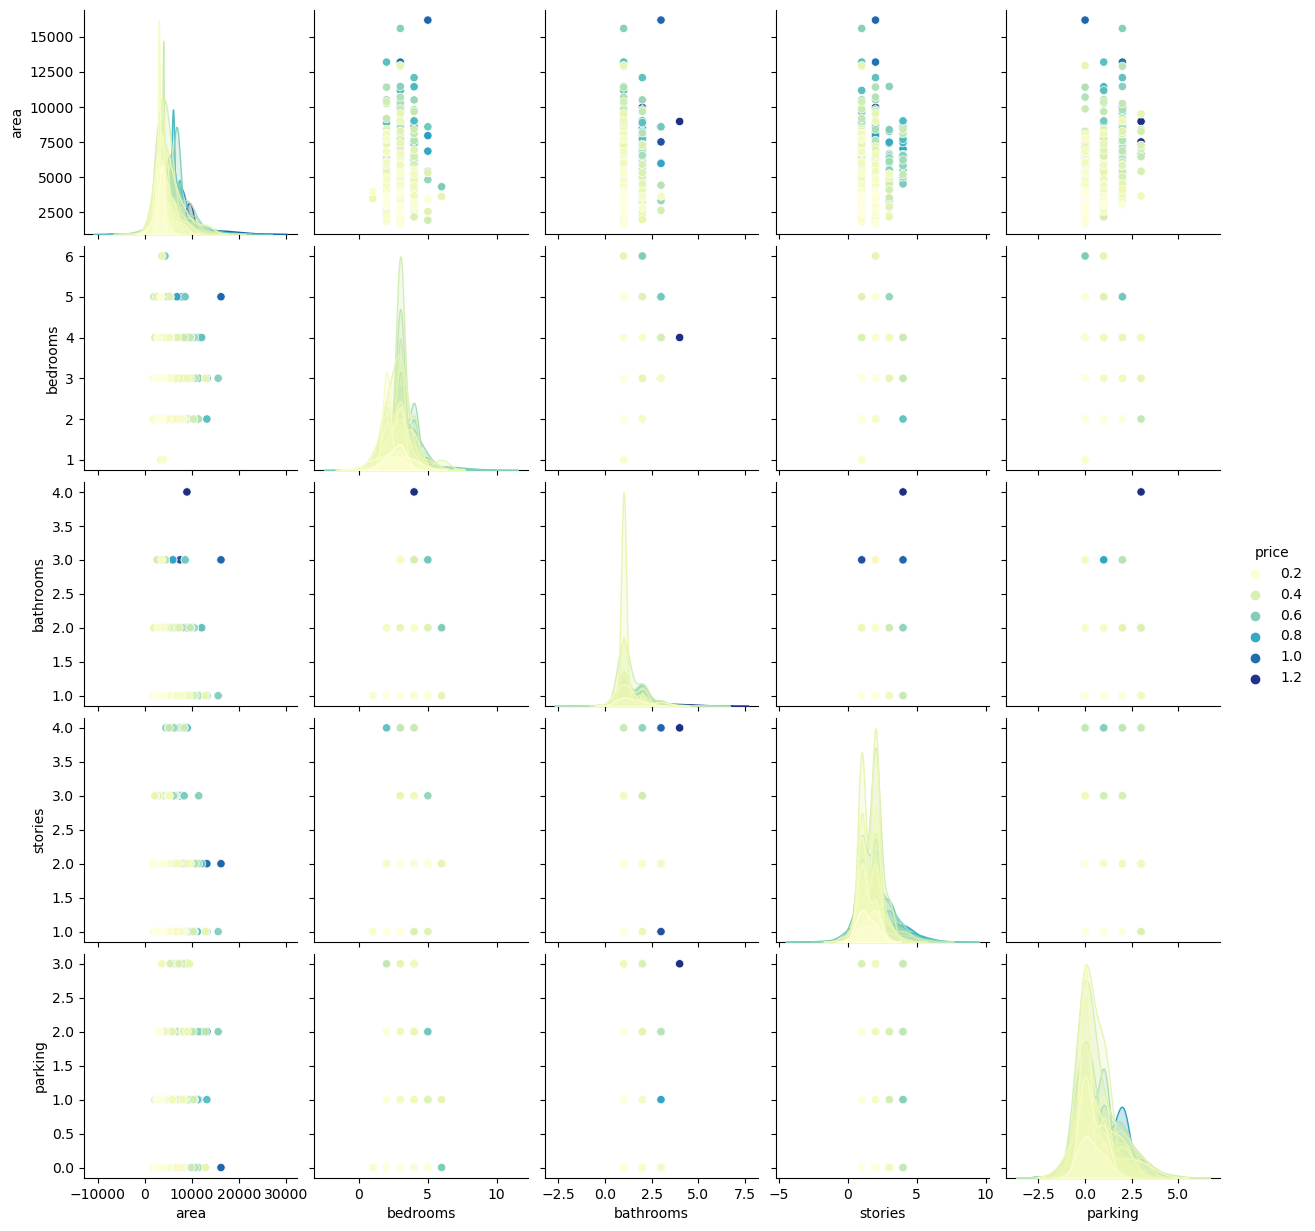

In [23]:
# Creating scatter plot matrix showing relationship between the numerical attributes of the dataset, grouped by target attribute
num_df = df.select_dtypes(exclude = ['object'])
sns.pairplot(data = num_df, hue = 'price', dropna = True, palette = 'YlGnBu');

## 3. Descriptive Statistics

In [24]:
# Generating the Descriptive Statistics for the numerical attributes of the dataset
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [25]:
# From the univariate analysis and the above descriptive stats, we can observe that price and area were right skewed, let us check the skewness value for them
df[['price','area']].skew()

price    1.212239
area     1.321188
dtype: float64

## 4. Checking and Dealing with Missing Values

In [26]:
# Checking for null values
df.isnull().any()

price               False
area                False
bedrooms            False
bathrooms           False
stories             False
mainroad            False
guestroom           False
basement            False
hotwaterheating     False
airconditioning     False
parking             False
furnishingstatus    False
dtype: bool

Since no missing values as seen above, we move onto the next part

## 5. Finding and Replacing the Outliers

In [27]:
# Finding the numerical attributes of the dataset
df.select_dtypes(exclude = ['object']).columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking'], dtype='object')

<AxesSubplot:xlabel='parking'>

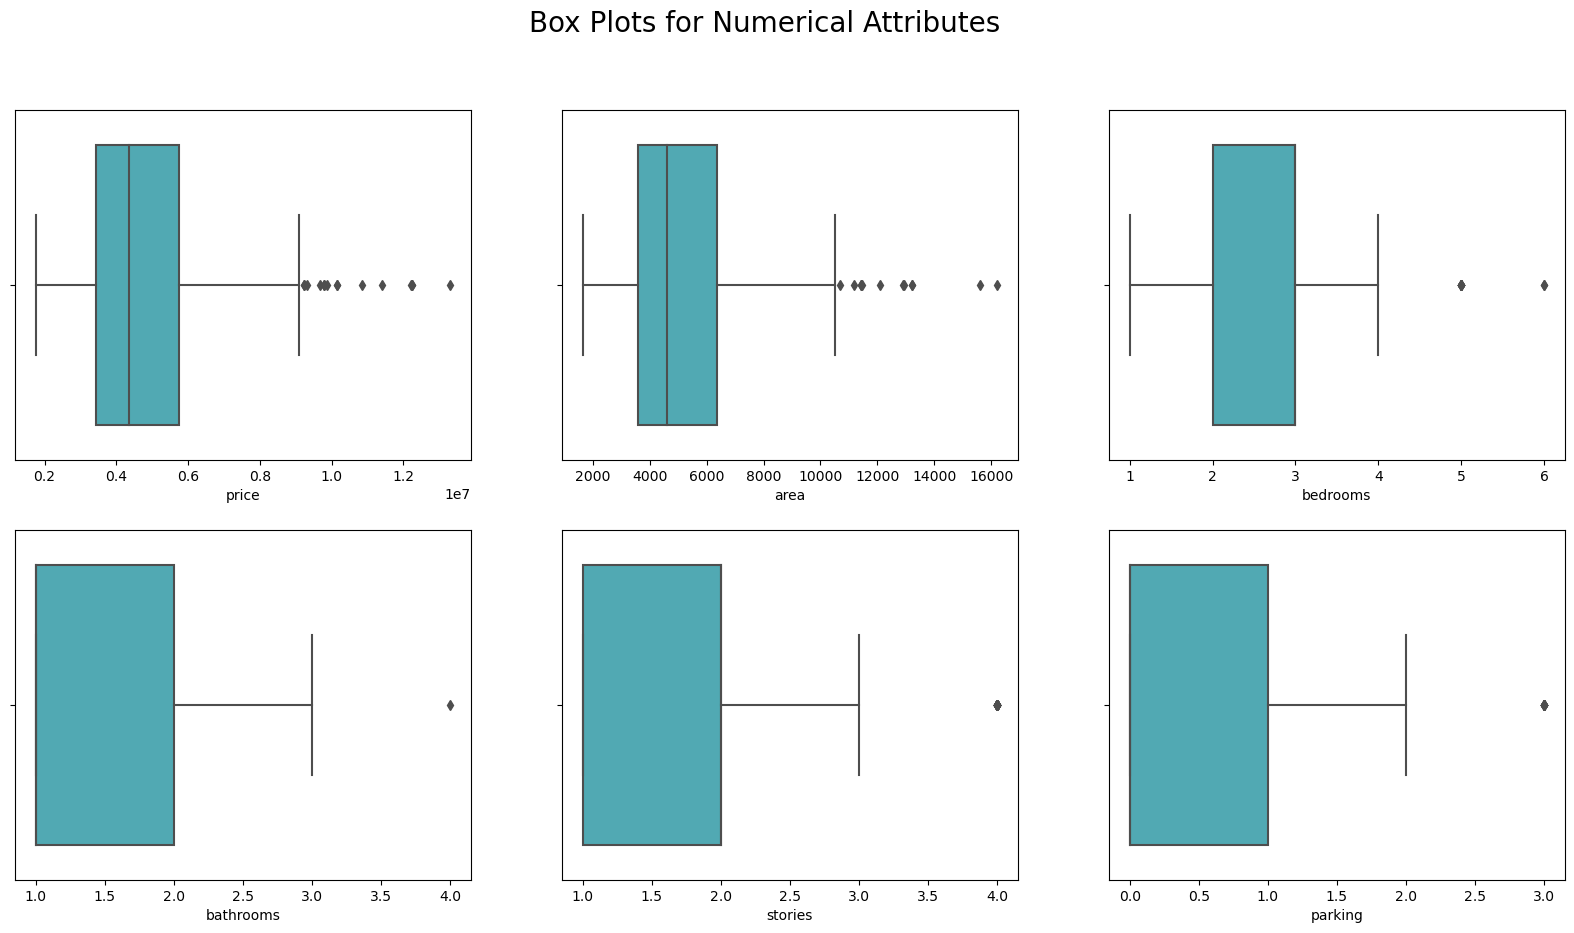

In [28]:
# Using Boxplots to visualize outliers
fig,ax = plt.subplots(2,3,figsize=(20, 10))
fig.suptitle('Box Plots for Numerical Attributes', fontsize = 20)

sns.boxplot(ax = ax[0,0], x = 'price', data = num_df, palette = 'YlGnBu')
sns.boxplot(ax = ax[0,1], x = 'area', data = num_df, palette = 'YlGnBu')
sns.boxplot(ax = ax[0,2], x = 'bedrooms', data = num_df, palette = 'YlGnBu')

sns.boxplot(ax = ax[1,0], x = 'bathrooms', data = num_df, palette = 'YlGnBu')
sns.boxplot(ax = ax[1,1], x = 'stories', data = num_df, palette = 'YlGnBu')
sns.boxplot(ax = ax[1,2], x = 'parking', data = num_df, palette = 'YlGnBu')

<AxesSubplot:xlabel='price'>

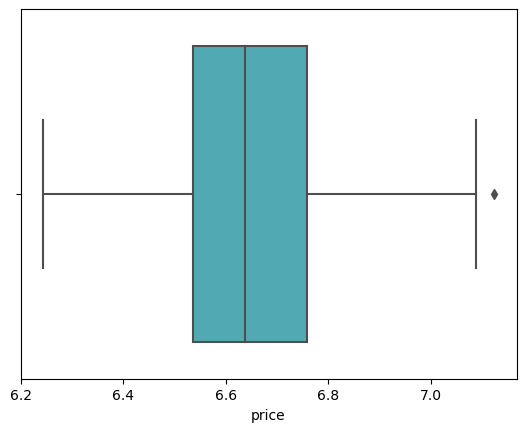

In [29]:
# Attempting log transformation to remove the outliers of the price attribute
price_log = np.log10(df['price'])
sns.boxplot(x = price_log, palette = 'YlGnBu')

<AxesSubplot:xlabel='area'>

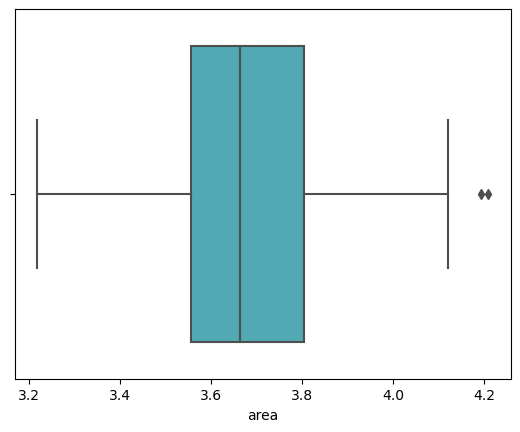

In [30]:
# Attempting log transformation to remove the outliers of the area attribute
area_log = np.log10(df['area'])
sns.boxplot(x = area_log, palette = 'YlGnBu')

In [31]:
# Since the above process has been successful in removing most of the outliers from the dataset, let us replace the price and area attribute with its log values
df['price'] = price_log
df['area'] = area_log

In [32]:
# Checking whether the values have been successfully replaced
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,furnishingstatus
0,7.123852,3.870404,4,2,3,yes,no,no,no,yes,2,furnished
1,7.088136,3.952308,4,4,4,yes,no,no,no,yes,3,furnished
2,7.088136,3.998259,3,2,2,yes,no,yes,no,no,2,semi-furnished
3,7.086893,3.875061,4,2,2,yes,no,yes,no,yes,3,furnished
4,7.057286,3.870404,4,1,2,yes,yes,yes,no,yes,2,furnished


## 6. Checking for Categorical Columns and Performing Encoding

In [33]:
# Finding the categorical attributes of the dataset
df.select_dtypes(include = ['object']).columns

Index(['mainroad', 'guestroom', 'basement', 'hotwaterheating',
       'airconditioning', 'furnishingstatus'],
      dtype='object')

In [34]:
# Creating an instance of Label Encoder
le = LabelEncoder()

In [35]:
# Encoding categorical values using Label Encoder
df['mainroad'] = le.fit_transform(df['mainroad'])
df['guestroom'] = le.fit_transform(df['guestroom'])
df['basement'] = le.fit_transform(df['basement'])
df['hotwaterheating'] = le.fit_transform(df['hotwaterheating'])
df['airconditioning'] = le.fit_transform(df['airconditioning'])
df['furnishingstatus'] = le.fit_transform(df['furnishingstatus'])

In [36]:
# Checking whether all the values have been successfully encoded
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,furnishingstatus
0,7.123852,3.870404,4,2,3,1,0,0,0,1,2,0
1,7.088136,3.952308,4,4,4,1,0,0,0,1,3,0
2,7.088136,3.998259,3,2,2,1,0,1,0,0,2,1
3,7.086893,3.875061,4,2,2,1,0,1,0,1,3,0
4,7.057286,3.870404,4,1,2,1,1,1,0,1,2,0


## 7. Splitting the Dataset into Dependent and Independent Variables

In [37]:
# y -> dependent variable(target), X -> independent variables(predictors)
y = df['price']
X = df.drop(['price'], axis = 1)

In [38]:
# Displaying the first five instances of the dependent variable
y.head()

0    7.123852
1    7.088136
2    7.088136
3    7.086893
4    7.057286
Name: price, dtype: float64

In [39]:
# Displaying the first five records of the independent variables
X.head()

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,furnishingstatus
0,3.870404,4,2,3,1,0,0,0,1,2,0
1,3.952308,4,4,4,1,0,0,0,1,3,0
2,3.998259,3,2,2,1,0,1,0,0,2,1
3,3.875061,4,2,2,1,0,1,0,1,3,0
4,3.870404,4,1,2,1,1,1,0,1,2,0


## 8. Scaling the Independent Variables

In [40]:
# Creating an instance of MinMax Scaler
scale = MinMaxScaler()

In [41]:
# Scaling the independent variables so that their values lie in the range [0,1]
X_scaled = scale.fit_transform(X)

In [42]:
# Replacing the orginal values with the scaled values
X = pd.DataFrame(X_scaled, columns = X.columns)

In [43]:
# Checking whether the values have been successfully scaled
X.head()

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,furnishingstatus
0,0.658165,0.6,0.333333,0.666667,1.0,0.0,0.0,0.0,1.0,0.666667,0.0
1,0.740727,0.6,1.000000,1.000000,1.0,0.0,0.0,0.0,1.0,1.000000,0.0
2,0.787047,0.4,0.333333,0.333333,1.0,0.0,1.0,0.0,0.0,0.666667,0.5
3,0.662860,0.6,0.333333,0.333333,1.0,0.0,1.0,0.0,1.0,1.000000,0.0
4,0.658165,0.6,0.000000,0.333333,1.0,1.0,1.0,0.0,1.0,0.666667,0.0


## 9. Splitting the Dataset into Training and Testing Set

In [44]:
# Splitting the dataset in a 75:25 train-test split ratio (i.e. 75% records will belong to training set and rest 25% to the testing set)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

## 10. Building the Regression Model

### 10.1 Linear Regression

In [45]:
# Creating an instance of the model
lr = LinearRegression()

In [46]:
# Fitting the model on the training set
lr.fit(X_train,y_train)

LinearRegression()

In [47]:
# Getting the model predictions
y_pred = lr.predict(X_test)

Evaluating the model performance

In [48]:
error = y_test-y_pred
error

316   -0.094786
77    -0.004728
360    0.047809
90     0.155606
493   -0.108577
         ...   
172   -0.089592
124   -0.045331
388    0.018823
521   -0.050918
503   -0.105890
Name: price, Length: 137, dtype: float64

In [49]:
# Squared Error
se = error*error
se

316    0.008984
77     0.000022
360    0.002286
90     0.024213
493    0.011789
         ...   
172    0.008027
124    0.002055
388    0.000354
521    0.002593
503    0.011213
Name: price, Length: 137, dtype: float64

In [50]:
# Mean Squared Error
mse = mean_squared_error(y_test,y_pred)
mse

0.012118647696776454

In [51]:
# Root Mean Squared Error
rmse = sqrt(mse)
rmse

0.11008472962575896

In [52]:
# Mean Aboslute Error
mae = mean_absolute_error(y_test,y_pred)
mae

0.0854004850150145

In [53]:
# R-squared Score
r2 = r2_score(y_test,y_pred)
r2

0.6565096279952854

### 10.2 Lasso Regression

In [54]:
# Creating an instance of the model
l = Lasso()

In [55]:
# Fitting the model on the training set
l.fit(X_train,y_train)

Lasso()

In [56]:
# Getting the model predictions
y_pred = l.predict(X_test)

Evaluating the model performance

In [57]:
error = y_test-y_pred
error

316   -0.041182
77     0.173114
360   -0.080334
90     0.159178
493   -0.202550
         ...   
172    0.070451
124    0.124809
388   -0.105640
521   -0.268051
503   -0.224826
Name: price, Length: 137, dtype: float64

In [58]:
# Squared Error
se = error*error
se

316    0.001696
77     0.029968
360    0.006454
90     0.025338
493    0.041026
         ...   
172    0.004963
124    0.015577
388    0.011160
521    0.071852
503    0.050547
Name: price, Length: 137, dtype: float64

In [59]:
# Mean Squared Error
mse = mean_squared_error(y_test,y_pred)
mse

0.035342180203840404

In [60]:
# Root Mean Squared Error
rmse = sqrt(mse)
rmse

0.1879951600542961

In [61]:
# Mean Absolute Error
mae = mean_absolute_error(y_test,y_pred)
mae

0.1553243566277494

In [62]:
# R-squared Score
r2 = r2_score(y_test,y_pred)
r2

-0.0017370691371729752

### 10.3 Ridge Regression

In [63]:
# Creating an instance of the model
r = Ridge()

In [64]:
# Fitting the model on the training set
r.fit(X_train,y_train)

Ridge()

In [65]:
# Getting the model predictions
y_pred = r.predict(X_test)

In [66]:
error = y_test-y_pred
error

316   -0.084601
77     0.003040
360    0.046016
90     0.153532
493   -0.111660
         ...   
172   -0.089594
124   -0.036280
388    0.015419
521   -0.051084
503   -0.108733
Name: price, Length: 137, dtype: float64

In [67]:
# Squared Error
se = error*error
se

316    0.007157
77     0.000009
360    0.002117
90     0.023572
493    0.012468
         ...   
172    0.008027
124    0.001316
388    0.000238
521    0.002610
503    0.011823
Name: price, Length: 137, dtype: float64

In [68]:
# Mean Squared Error
mse = mean_squared_error(y_test,y_pred)
mse

0.01214606252466662

In [69]:
# Root Mean Squared Error
rmse = sqrt(mse)
rmse

0.11020917622714825

In [70]:
# Mean Absolute Error
mae = mean_absolute_error(y_test,y_pred)
mae

0.08526716964138649

In [71]:
# R-squared Score
r2 = r2_score(y_test,y_pred)
r2

0.6557325834218267

Mean Squared Error: lasso > ridge > linear regression (lower the MSE value, better the model)<br>
Root Mean Squared Error: lasso > ridge > linear regression (lower the RMSE value, better the model)<br>
Mean Absolute Error: lasso > linear regression > ridge (lower the MAE value, better the model)<br>
R-squared Score: linear regression > ridge > lasso (higher the R2 value, better the model)<br><br>
<b>By analyzing the evaluation metrics, we can see that Linear Regression performs the best and hence Linear Regression is the chosen ML Model for the deployment of house price prediction.